# Forumla 1

Formula One (also known as Formula 1 or F1) is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the Fédération Internationale de l'Automobile (FIA). The World Drivers' Championship, which became the FIA Formula One World Championship in 1981, has been one of the premier forms of racing around the world since its inaugural season in 1950. The word formula in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on both purpose-built circuits and closed public roads.

![forumla](https://wallpapercave.com/download/formula-1-logo-wallpapers-wp7514293)

In [1]:
# importing required libraries 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

# Importing the Data

In [2]:
result_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/results.csv')
stats_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/status.csv')
drivers_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/drivers.csv')
races_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/races.csv')
constructor_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructors.csv')
driver_standings_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/driver_standings.csv')
pd.get_option("display.max_columns",None)

In [3]:
result_df.head() 

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [4]:
stats_df.head() 

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [5]:
drivers_df.head() 

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [6]:
races_df.head() 

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
constructor_df.head() 

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [8]:
driver_standings_df.head() 

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


# Feature Engineering

In [9]:
races_df['raceId']

0          1
1          2
2          3
3          4
4          5
        ... 
1097    1116
1098    1117
1099    1118
1100    1119
1101    1120
Name: raceId, Length: 1102, dtype: int64

In [10]:
races_df = races_df.raceId.astype(int)

In [11]:
# merging all seperate dataframe into single dataframe as df

con1 = pd.merge(result_df, races_df, on ='raceId')
con2 = pd.merge(con1, drivers_df, on = 'driverId')
con3 = pd.merge(con2, driver_standings_df, on = 'driverId')
con4 = pd.merge(con3, constructor_df, on ='constructorId')
df = pd.merge(con4, stats_df, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [12]:
# checking of null values

df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time                 0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
url_x                0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name                 0
nationality_y        0
url_y                0
status               0
dtype: int64

In [13]:
# There's no null values in the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3475793 entries, 0 to 3475792
Data columns (total 37 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time               object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  driverRef          object 
 19  number_y           object 
 20  code               object 
 21  forename           object 
 22  surname            object 
 23  dob                object 
 24  nationality_x      object 
 25  url_x             

# Describe
Describe function is used to show the statistical value of each column. which all include:

* Count of the column
* Mean value of the column
* Standard Deviation of the column
* Minimum value of the column
* 25% percentile of the column
* 50% percentile of the column
* 75% percentile of the column
* Maximum value of the column

In [15]:
# summary
df.describe().T  

,count,mean,std,min,25%,50%,75%,max
resultId,3475793.0,12422.331069,8110.854092,1.0,5012.0,11533.0,20898.0,25845.0
raceId_x,3475793.0,508.145756,326.453137,1.0,230.0,460.0,846.0,1096.0
driverId,3475793.0,196.776627,257.851717,1.0,20.0,102.0,223.0,856.0
constructorId,3475793.0,38.660555,55.991163,1.0,6.0,16.0,37.0,214.0
grid,3475793.0,9.785105,6.571435,0.0,4.0,9.0,15.0,34.0
positionOrder,3475793.0,11.269636,7.396828,1.0,5.0,10.0,17.0,39.0
points_x,3475793.0,2.930560,5.256458,0.0,0.0,0.0,4.0,50.0
laps,3475793.0,48.224917,25.237033,0.0,32.0,54.0,67.0,200.0
statusId,3475793.0,13.344617,22.571360,1.0,1.0,5.0,12.0,141.0
driverStandingsId,3475793.0,39611.793178,25203.420818,1.0,13784.0,48887.0,65545.0,71845.0


In [16]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name,nationality_y,url_y,status
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,9,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,48,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [17]:
# droping unwanted columns 

df = df.drop(['url_y','url_x','position_x','fastestLapTime','positionText_x','time','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y'],1)

In [18]:
# changing of old column name to meaningful name 

col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,forename,surname,dob,nationality,driverStandingsId,position,wins,name,status
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,1,1,1,McLaren,Finished
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,9,1,1,McLaren,Finished
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,27,3,1,McLaren,Finished
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,48,2,1,McLaren,Finished
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,Lewis,Hamilton,1985-01-07,British,69,3,1,McLaren,Finished


![overtake](https://c.tenor.com/IB4EgSxeYREAAAAd/f1-max-verstappen.gif)

In [19]:
# Adding two column (forename,surname) to create a single column called driver_name

df['driver_name'] = df['forename']+' '+df['surname']

In [20]:
df = df.drop(['forename','surname'],1)

# Converting dtype

Changing of data type from object to date to calculate the driver's age.

In [21]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton


In [22]:
# converting to date format from string 

pd.to_datetime(df.dob)

0         1985-01-07
1         1985-01-07
2         1985-01-07
3         1985-01-07
4         1985-01-07
             ...    
3475788   1913-05-05
3475789   1913-05-05
3475790   1913-05-05
3475791   1913-05-05
3475792   1913-05-05
Name: dob, Length: 3475793, dtype: datetime64[ns]

In [23]:
df['dob'] = pd.to_datetime(df['dob'])

In [24]:
from datetime import datetime

In [25]:
# calculating driver's age and creating it as a new column

dates = datetime.today()-df['dob']
age = dates.dt.days/365

In [26]:
df['age'] = round(age)

In [27]:
pd.set_option('display.max_columns', None)
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_num,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22,1,1,10.0,58,5690616,39,2,218.300,1,44,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [28]:
# changing datatype

l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [29]:
df.drop('driver_num',1,inplace=True)

In [30]:
# seperating categorical and numerical columns for understading 

cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [31]:
df[cat].head()

,driver_code,nationality,name,status,driver_name
0,HAM,British,McLaren,Finished,Lewis Hamilton
1,HAM,British,McLaren,Finished,Lewis Hamilton
2,HAM,British,McLaren,Finished,Lewis Hamilton
3,HAM,British,McLaren,Finished,Lewis Hamilton
4,HAM,British,McLaren,Finished,Lewis Hamilton


In [32]:
df[num].head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,dob,driverStandingsId,position,wins,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,1,1,1,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,9,1,1,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,27,3,1,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,48,2,1,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,1985-01-07,69,3,1,38.0


In [33]:
df.dtypes

resultId                          int64
racerId                           int64
driverId                          int64
constructorId                     int64
number                          float64
grid                              int64
positionOrder                     int64
points                          float64
laps                              int64
timetaken_in_millisec           float64
fastestLap                      float64
rank                            float64
max_speed                       float64
statusId                          int64
driver_code                      object
dob                      datetime64[ns]
nationality                      object
driverStandingsId                 int64
position                          int64
wins                              int64
name                             object
status                           object
driver_name                      object
age                             float64
dtype: object

In [34]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [35]:
df.isnull().sum() / len(df) * 100

resultId                  0.000000
racerId                   0.000000
driverId                  0.000000
constructorId             0.000000
number                    0.004603
grid                      0.000000
positionOrder             0.000000
points                    0.000000
laps                      0.000000
timetaken_in_millisec    61.963788
fastestLap               61.531685
rank                     60.559533
max_speed                61.531685
statusId                  0.000000
driver_code               0.000000
dob                       0.000000
nationality               0.000000
driverStandingsId         0.000000
position                  0.000000
wins                      0.000000
name                      0.000000
status                    0.000000
driver_name               0.000000
age                       0.000000
dtype: float64

In [36]:
df['max_speed'].mean()

203.77403833646835

In [37]:
df[['rank','fastestLap']] = df[['rank','fastestLap']].fillna(0)
df['timetaken_in_millisec'] = df['timetaken_in_millisec'].fillna(df['timetaken_in_millisec'].mean())
df['max_speed']= df['max_speed'].fillna(df['max_speed'].mean())
df['number'] = df['number'].fillna(0)

In [38]:
df.isnull().sum() / len(df) * 100

resultId                 0.0
racerId                  0.0
driverId                 0.0
constructorId            0.0
number                   0.0
grid                     0.0
positionOrder            0.0
points                   0.0
laps                     0.0
timetaken_in_millisec    0.0
fastestLap               0.0
rank                     0.0
max_speed                0.0
statusId                 0.0
driver_code              0.0
dob                      0.0
nationality              0.0
driverStandingsId        0.0
position                 0.0
wins                     0.0
name                     0.0
status                   0.0
driver_name              0.0
age                      0.0
dtype: float64

In [39]:
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
resultId,3475793.0,1.242233e+04,8110.854092,1.00,5.012000e+03,1.153300e+04,2.089800e+04,25845.00
racerId,3475793.0,5.081458e+02,326.453137,1.00,2.300000e+02,4.600000e+02,8.460000e+02,1096.00
driverId,3475793.0,1.967766e+02,257.851717,1.00,2.000000e+01,1.020000e+02,2.230000e+02,856.00
constructorId,3475793.0,3.866055e+01,55.991163,1.00,6.000000e+00,1.600000e+01,3.700000e+01,214.00
number,3475793.0,1.521082e+01,13.738279,0.00,6.000000e+00,1.200000e+01,2.100000e+01,208.00
grid,3475793.0,9.785105e+00,6.571435,0.00,4.000000e+00,9.000000e+00,1.500000e+01,34.00
positionOrder,3475793.0,1.126964e+01,7.396828,1.00,5.000000e+00,1.000000e+01,1.700000e+01,39.00
points,3475793.0,2.930560e+00,5.256458,0.00,0.000000e+00,0.000000e+00,4.000000e+00,50.00
laps,3475793.0,4.822492e+01,25.237033,0.00,3.200000e+01,5.400000e+01,6.700000e+01,200.00
timetaken_in_millisec,3475793.0,5.960713e+06,756932.831768,207071.00,5.960713e+06,5.960713e+06,5.960713e+06,15090540.00


# Map

The map is used to plot the track that are used all around the world using latitude and longitude.

In [41]:
circuit_df = pd.read_csv('../input/formula-1-world-championship-1950-2020/circuits.csv')
circuit_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [42]:
# ploting the f1 track using lat and lng in worldmap

import folium
coordinates=[]
for lat,lng in zip(circuit_df['lat'],circuit_df['lng']):
    coordinates.append([lat,lng])
maps = folium.Map(zoom_start=2,tiles='Stamen Watercolor')  #map_types (Stamen Terrain, Stamen Toner, Mapbox Bright, cartodbpositron)
for i,j in zip(coordinates,circuit_df.name):
    marker = folium.Marker(
        location=i,
        icon=folium.Icon(icon="car",color='cadetblue',prefix='fa'),
        popup="<strong>{0}</strong>".format(j))  #strong is used to bold the font (optional)
    marker.add_to(maps)
maps

In [43]:
df['rank'].unique()

array([ 2.,  3.,  6.,  5.,  4., 11.,  1., 12., 15., 10.,  9.,  8.,  7.,
       18., 19., 13., 17.,  0., 14., 16., 20., 21., 22., 23., 24.])

# Data Filtration

Filtering data by the driver who finished the race successfully

In [44]:
df_fin = df[df['status'] == 'Finished']
df_fin.tail()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
1320982,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,71744,8,0,Manor Marussia,Finished,Esteban Ocon,27.0
1320983,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,71766,8,0,Manor Marussia,Finished,Esteban Ocon,27.0
1320984,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,71788,8,0,Manor Marussia,Finished,Esteban Ocon,27.0
1320985,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,71810,8,0,Manor Marussia,Finished,Esteban Ocon,27.0
1320986,23346,967,839,209,31.0,22,12,0.0,71,10907144.0,47.0,16.0,176.686,1,OCO,1996-09-17,French,71835,10,0,Manor Marussia,Finished,Esteban Ocon,27.0


In [45]:
mean = df.max_speed.mean()
mean2 = df.fastestLap.mean()
df = df_fin[df_fin['max_speed']>mean]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [46]:
df[df['fastestLap']>mean2]

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.300,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320824,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,TSU,2000-05-11,Japanese,71745,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1320825,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,TSU,2000-05-11,Japanese,71767,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1320826,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,TSU,2000-05-11,Japanese,71789,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0
1320827,25836,1096,852,213,22.0,11,11,0.0,58,5355285.0,40.0,7.0,212.446,1,TSU,2000-05-11,Japanese,71811,17,0,AlphaTauri,Finished,Yuki Tsunoda,23.0


In [47]:
# filtering the data by mean of driver's age

df = df[df['age']<df['age'].mean()]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,statusId,driver_code,dob,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,1,HAM,1985-01-07,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


In [48]:
# droping unwanted columns

df.drop('dob',1,inplace=True)
df.drop('statusId',1,inplace=True)

# Skewness

Checking for skewness in the data, Skewness is used to check the normality of the data by ranging from -1 to 1.
* -1 --> Left skewed 
* 0 --> Normal distribution
* 1 --> Right skewed

In [49]:
df.skew()

resultId                -0.001389
racerId                  0.127904
driverId                 1.444681
constructorId            2.017793
number                   2.353728
grid                     1.002286
positionOrder            0.962386
points                   1.062969
laps                    -0.823678
timetaken_in_millisec    1.007081
fastestLap              -0.342045
rank                     0.854610
max_speed                1.059712
driverStandingsId       -0.411584
position                 0.779432
wins                     2.788256
age                     -0.281862
dtype: float64

# Outlier Treatment

Seems some columns are skewed a lot, removal of the outliers will normalize a data bit

In [50]:
# outlier removal 

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driver_code,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,1,1,1,McLaren,Finished,Lewis Hamilton,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,9,1,1,McLaren,Finished,Lewis Hamilton,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,27,3,1,McLaren,Finished,Lewis Hamilton,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,48,2,1,McLaren,Finished,Lewis Hamilton,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,HAM,British,69,3,1,McLaren,Finished,Lewis Hamilton,38.0


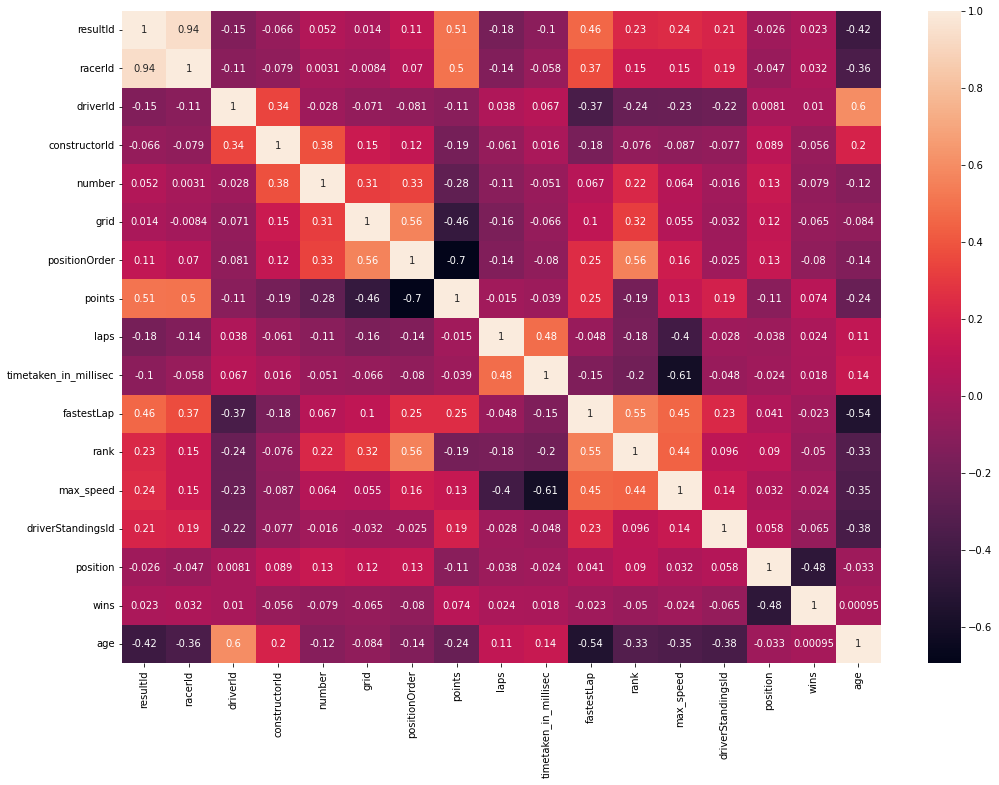

In [51]:
# heatmap

plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [52]:
num.remove('dob')
num.remove('statusId')

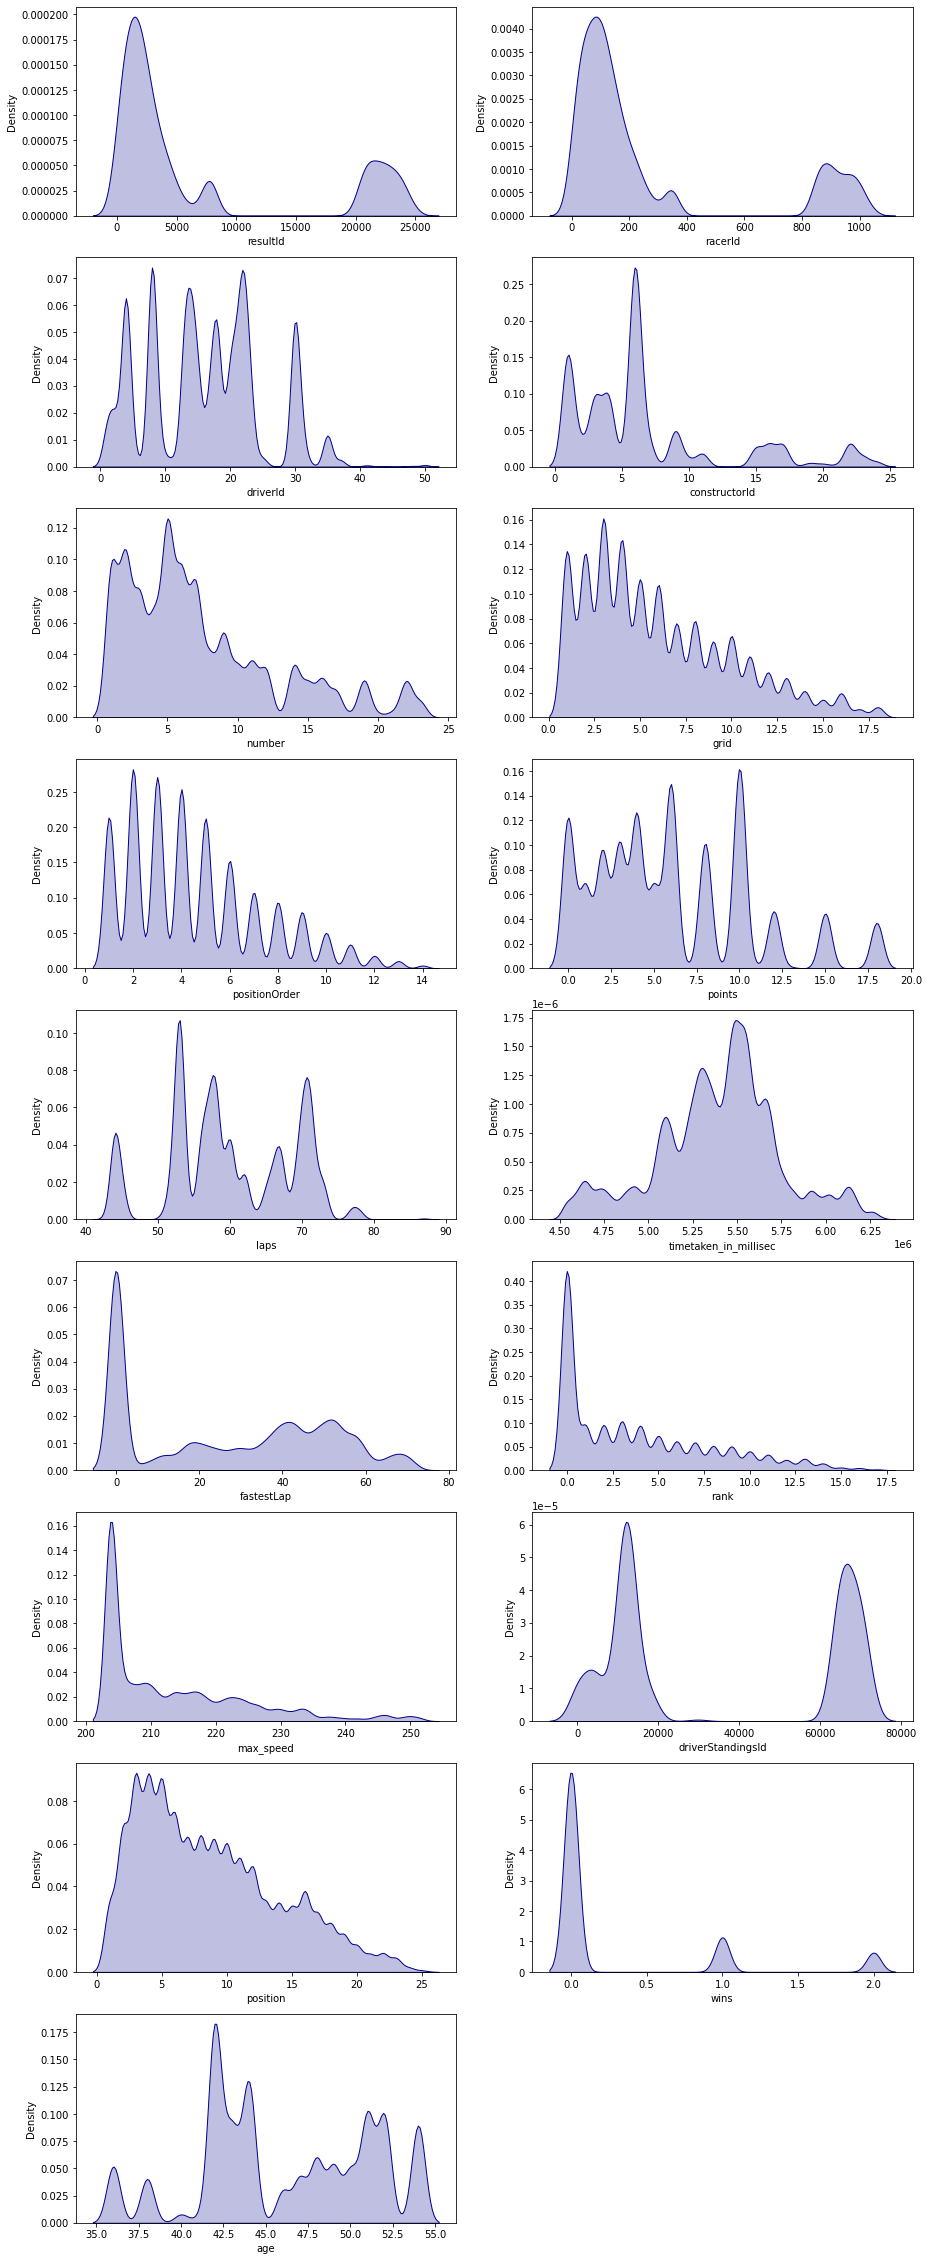

In [53]:
# kde plot for checking the normalization 

plt.figure(figsize=(15,50)) 
for i,j in zip(num,range(1,len(num)+1)):
    plt.subplot(11,2,j)
    sns.kdeplot(df[i],shade=True,color='darkblue')
plt.show()

In [54]:
df.skew()

resultId                 1.213284
racerId                  1.437651
driverId                 0.268967
constructorId            1.407777
number                   1.080650
grid                     0.830113
positionOrder            0.833138
points                   0.751718
laps                    -0.020477
timetaken_in_millisec   -0.197537
fastestLap               0.119300
rank                     0.947423
max_speed                1.279718
driverStandingsId        0.199254
position                 0.673158
wins                     1.926325
age                     -0.128694
dtype: float64

Still some columns are skewed even after outlier removal and skewness can be normalized during ML part.

# Encoding

I have choosen LabelEncoding instead of one hot encoding, because one hot will give you a various new columns based on the unique value. I will recommend LabelEncoding to use always, since it will replace in a single column for new value.

Note:
    
    * To represent a unicode string as a string of bytes is known as encoding.
    * To convert a string of bytes to a unicode string is known as decoding.

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
# encoding categorical columns

for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,resultId,racerId,driverId,constructorId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,driver_code,nationality,driverStandingsId,position,wins,name,status,driver_name,age
0,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,8,4,1,1,1,10,0,17,38.0
1,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,8,4,9,1,1,10,0,17,38.0
2,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,8,4,27,3,1,10,0,17,38.0
3,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,8,4,48,2,1,10,0,17,38.0
4,1,18,1,1,22.0,1,1,10.0,58,5690616.0,39.0,2.0,218.3,8,4,69,3,1,10,0,17,38.0


In [57]:
x = df.drop('driver_name',1)
y = df.driver_name

In [58]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# ML Algorithms

In [59]:
# importing ML libraries 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

In [60]:
clf = DecisionTreeClassifier(max_depth=5,random_state=1234)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=1234)

In [61]:
tree.export_text(clf)

'|--- feature_13 <= 0.50\n|   |--- class: 7\n|--- feature_13 >  0.50\n|   |--- feature_13 <= 1.50\n|   |   |--- class: 28\n|   |--- feature_13 >  1.50\n|   |   |--- feature_20 <= 53.00\n|   |   |   |--- feature_2 <= 8.50\n|   |   |   |   |--- feature_2 <= 7.50\n|   |   |   |   |   |--- class: 22\n|   |   |   |   |--- feature_2 >  7.50\n|   |   |   |   |   |--- class: 16\n|   |   |   |--- feature_2 >  8.50\n|   |   |   |   |--- feature_13 <= 3.50\n|   |   |   |   |   |--- class: 12\n|   |   |   |   |--- feature_13 >  3.50\n|   |   |   |   |   |--- class: 5\n|   |   |--- feature_20 >  53.00\n|   |   |   |--- class: 20\n'

In [62]:
fn = list(df.columns)
fn.remove('driver_name')

# DT workflow

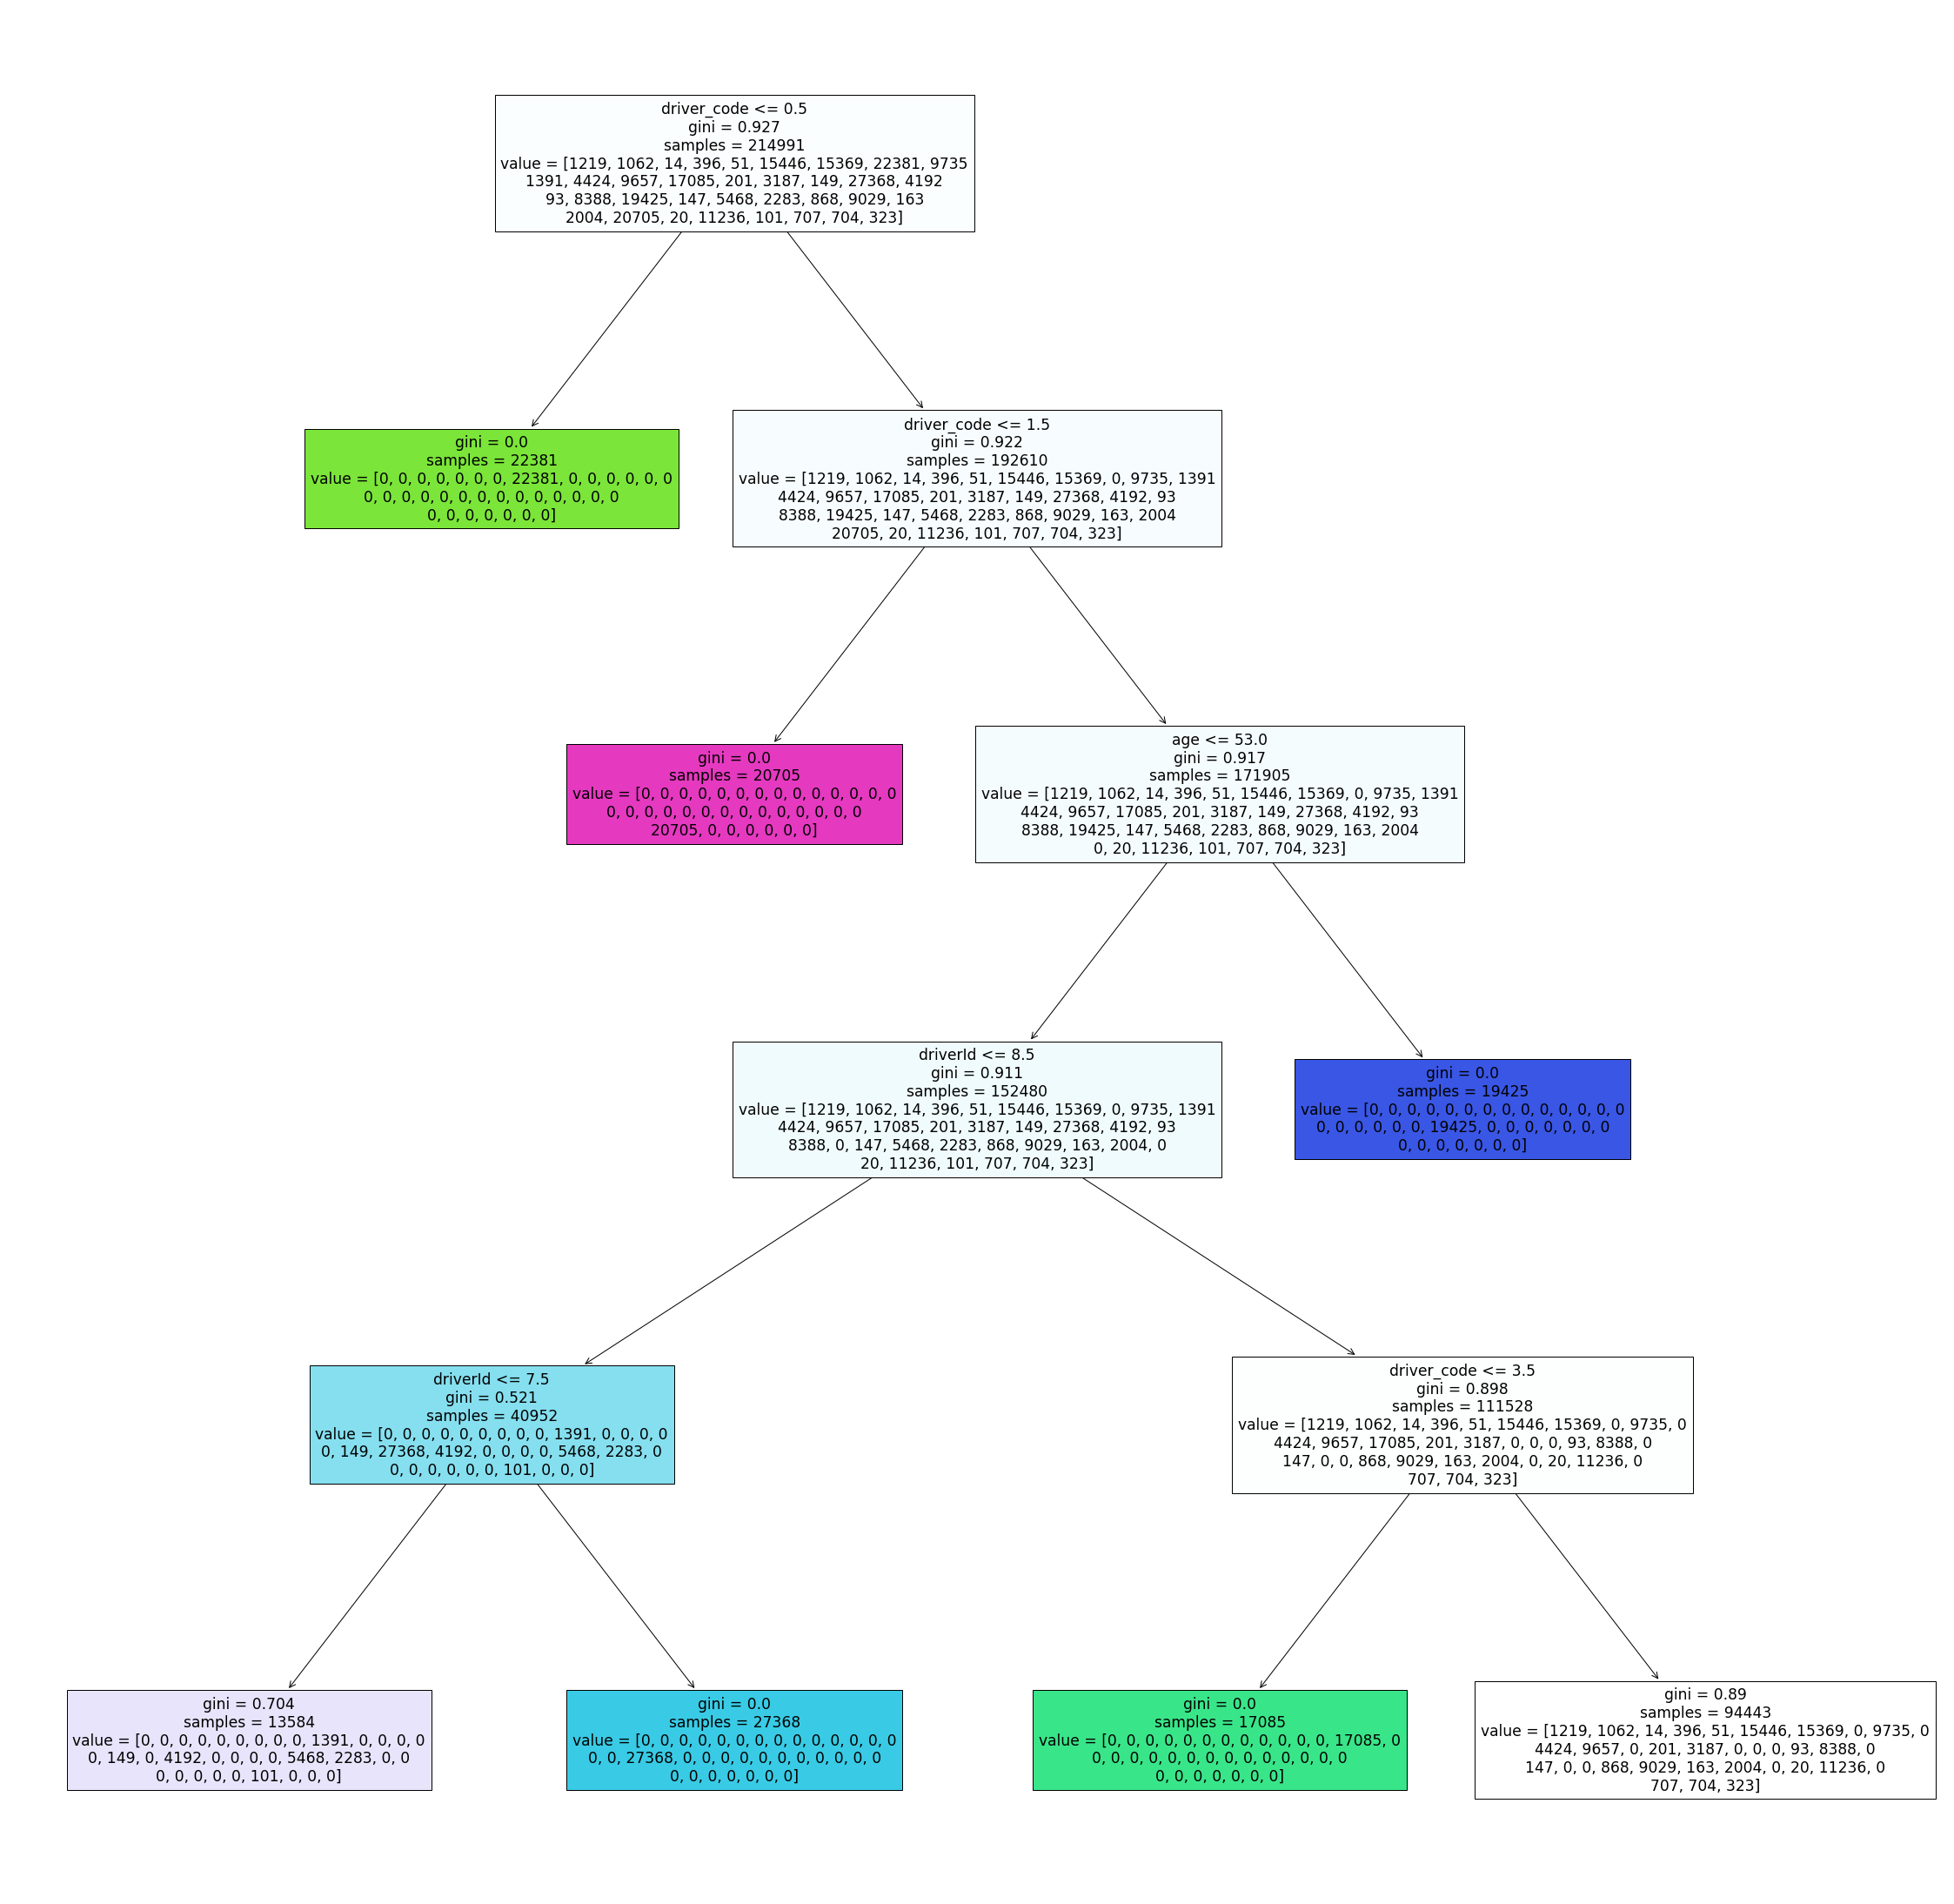

In [63]:
# plotting decision tree workflow 

fig = plt.figure(figsize=(40,40))
_ = tree.plot_tree(clf,
               feature_names=fn,
               filled=True)

# Modeling the data

In [64]:
# classification ML algorithms 

lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [65]:
li = [lr,sgd,knn,gb,rn,dt]
d = {}
for i in li:
    i.fit(xtrain,ytrain)
    ypred = i.predict(xtest)
    print(i,":",accuracy_score(ypred,ytest)*100)
    d.update({str(i):i.score(xtest,ytest)*100})

LogisticRegression(solver='sag') : 17.283669238867365
SGDClassifier() : 10.628506929747447
KNeighborsClassifier() : 99.14911166824038
GaussianNB() : 44.53705814041828
RandomForestClassifier() : 100.0
DecisionTreeClassifier() : 100.0


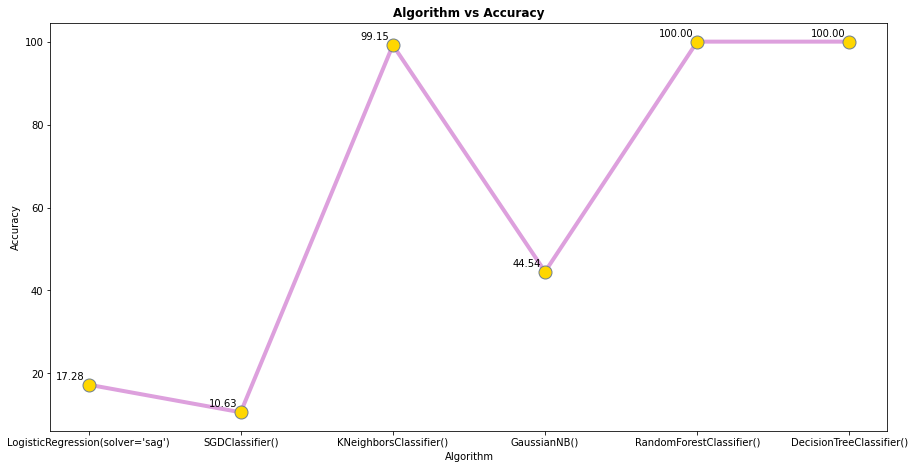

In [66]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='plum',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
for x,y in zip(d.keys(),d.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see, the accuracy of basic algorithm (logistic) and SGD is not good as expected. Since the data are skewed/denormalized, so it can be fixed by scaling the data.

# [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

Each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [67]:
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(xtrain)
# transform training data
X_train_norm = norm.transform(xtrain)
# transform testing data
X_test_norm = norm.transform(xtest)

In [68]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,ytrain)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,ytest)*100)
    di.update({str(i):i.score(X_test_norm,ytest)*100})

LogisticRegression(solver='sag') : 99.9316250447693
SGDClassifier() : 95.86494318366815
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 99.99782936650061
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


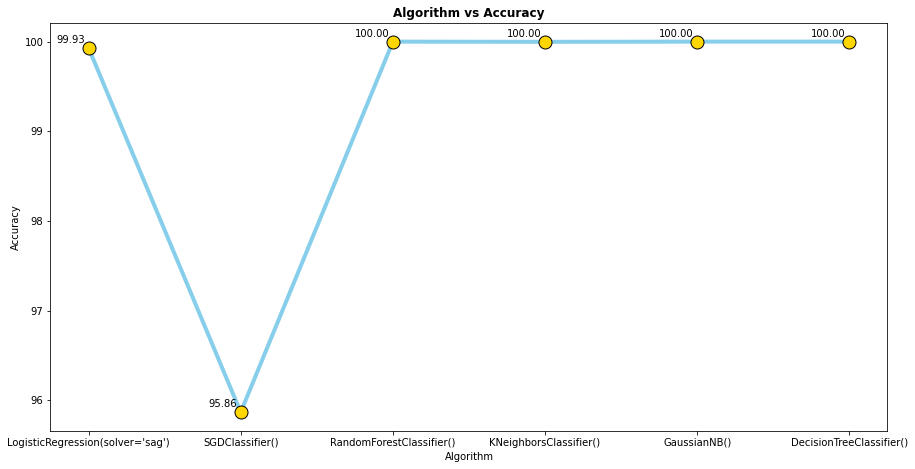

In [69]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(di.keys(),di.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

As you can see the accuracy are getting high for Logistic Regression and SGDClassifier, both the algorithms are performing well from bottom low to 99% accuracy by scaling. Hence this prove the importance of normalizing the data.

# [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [70]:
from sklearn.preprocessing import StandardScaler
# fit scaler on training data
std = StandardScaler().fit(xtrain)
# transform train data
x_train_std = std.transform(xtrain)
# transform test data
x_test_std = std.transform(xtest)

In [71]:
li = [lr,sgd,rn,knn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,ytrain)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dic.update({str(i):i.score(x_test_std,ytest)*100})

LogisticRegression(solver='sag') : 100.0
SGDClassifier() : 98.99933795678268
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 99.9989146832503
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


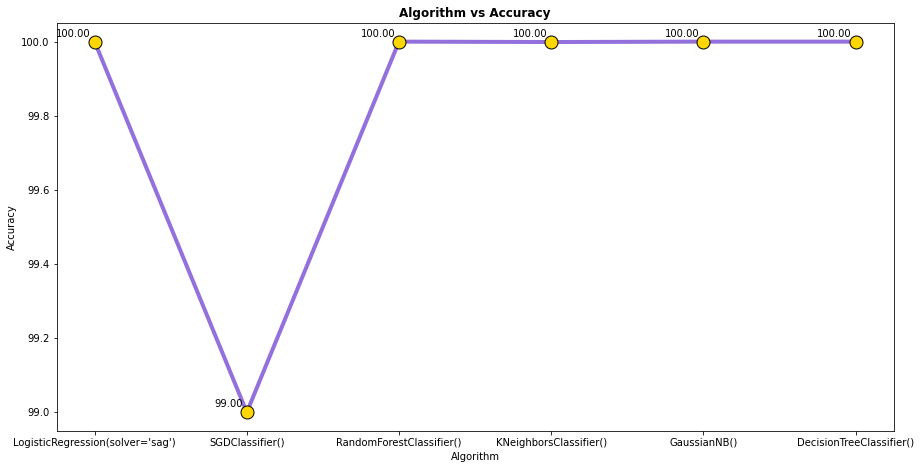

In [72]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dic.keys(),dic.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

# [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) 

Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile)

In [73]:
from sklearn.preprocessing import RobustScaler
# fit scaler on train data
scaler = RobustScaler().fit(xtrain)
# transform train data
xtrain_scaled = scaler.transform(xtrain)
# transform test data
xtest_scaled = scaler.transform(xtest)

In [74]:
li = [lr,sgd,rn,knn,gb,dt]
dics = {}
for i in li:
    i.fit(xtrain_scaled,ytrain)
    ypred = i.predict(xtest_scaled)
    print(i,":",accuracy_score(ypred,ytest)*100)
    dics.update({str(i):i.score(xtest_scaled,ytest)*100})

LogisticRegression(solver='sag') : 99.9989146832503
SGDClassifier() : 98.05077111755067
RandomForestClassifier() : 100.0
KNeighborsClassifier() : 99.9989146832503
GaussianNB() : 100.0
DecisionTreeClassifier() : 100.0


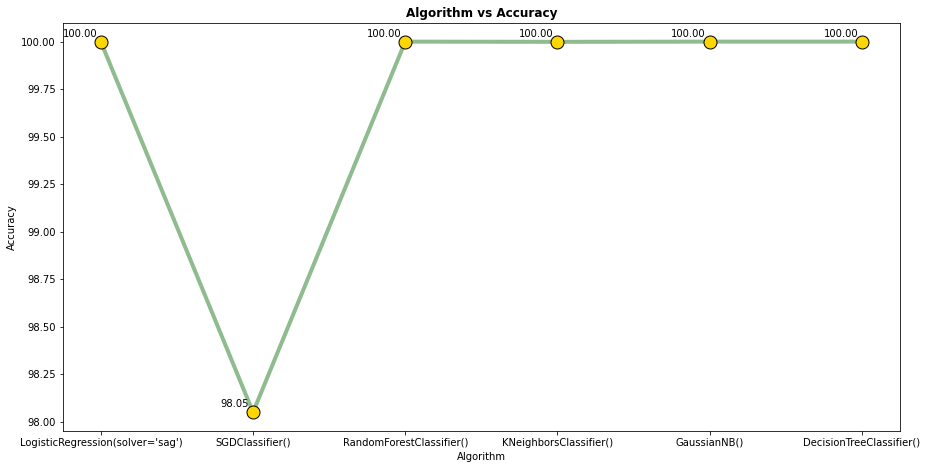

In [75]:
plt.figure(figsize=(15, 7.5))
plt.title("Algorithm vs Accuracy", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dics.keys(),dics.values(),marker='o',color='darkseagreen',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
for x,y in zip(dics.keys(),dics.values()):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y),textcoords="offset points",xytext=(-3.75,5),ha='right')
plt.show()

After several stages of scaling process, got a good accuracy score of 100% in all algorithms except SGDClassifier with least of 99% for StandardScaler. Even the least (SGDClassifier) is considered as a very good accuracy.

We made it team, we made it! 🎉

![podium](https://c.tenor.com/agI-d6PVLeIAAAAC/sebastian-vettel.gif)

# Thank you!